In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from ydata_profiling import ProfileReport
import sweetviz as sv

In [2]:
# 读取数据
file_path = r"F:\cache_data\pre_property_table\ky\feature_ky.csv"
data = pd.read_csv(file_path)
# data.rename(columns={'有机质含量':'SOM'},inplace=True)
data.head()

,pH,B,Cu,Mn,N,P,Zn,K2O,som,AnalyticalHillshading,...,Entropy,Homogeneity,Mean,ndvi,PCA_0,PCA_1,SecondMoment,Variance,LON,LAT
0,5.64,52.0,14.7,182.0,1813.0,528.0,61.1,2.68,24.9,0.941856,...,1.368923,0.722222,8.555555,0.357157,0.061695,0.034766,0.259259,0.246914,401530.0,3006305.0
1,7.58,64.4,25.2,1196.0,1578.0,627.0,152.0,1.32,41.8,0.907645,...,0.964963,0.722222,9.888889,0.301731,0.142222,0.091776,0.407407,0.098765,401420.0,3005935.0
2,5.01,31.7,61.7,2340.0,1657.0,826.0,142.0,0.81,25.3,1.007805,...,1.273028,0.777778,7.333334,0.237582,0.001301,0.077799,0.308642,0.222222,401845.0,3006295.0
3,4.97,64.4,64.8,2839.0,1313.0,744.0,105.0,1.88,30.9,0.852067,...,1.735127,0.688889,8.777778,0.281274,0.051415,0.071846,0.185185,0.617284,402680.0,3006195.0
4,5.77,34.8,64.7,1505.0,1540.0,930.0,150.0,0.72,26.1,0.631298,...,1.149060,0.833333,8.222222,0.191754,0.018916,0.130330,0.382716,0.172840,401960.0,3005920.0


In [3]:
data.columns

Index(['pH', 'B', 'Cu', 'Mn', 'N', 'P', 'Zn', 'K2O', 'som',
       'AnalyticalHillshading', 'Aspect', 'ChannelNetworkBaseLevel',
       'ChannelNetworkDistance', 'ClosedDepressions', 'ConvergenceIndex',
       'dem', 'LSFactor', 'PlanCurvature', 'ProfileCurvature',
       'RelativeSlopePosition', 'Slope', 'TopographicWetnessIndex',
       'TotalCatchmentArea', 'ValleyDepth', 'PRE', 'SRA', 'TMP', 'VAP', 'WIND',
       'BIO', 'Contrast', 'Correlation', 'Dissimilarity', 'Entropy',
       'Homogeneity', 'Mean', 'ndvi', 'PCA_0', 'PCA_1', 'SecondMoment',
       'Variance', 'LON', 'LAT'],
      dtype='object')

In [4]:
data.describe(),data.shape

(                pH            B           Cu           Mn            N  \
 count  7422.000000  7422.000000  7422.000000  7422.000000  7422.000000   
 mean      6.342436    78.686095    36.472358  1135.309014  1857.965912   
 std       1.111715    30.501120    22.565531   888.734884   584.440796   
 min       3.420000     8.990000     3.010000    34.400000   292.000000   
 25%       5.370000    58.400000    24.100000   491.250000  1465.000000   
 50%       6.200000    75.100000    31.200000   932.500000  1740.000000   
 75%       7.360000    94.600000    41.200000  1523.750000  2126.000000   
 max       9.320000   373.000000   254.000000  9490.000000  6082.000000   
 
                   P           Zn          K2O          som  \
 count   7422.000000  7422.000000  7422.000000  7422.000000   
 mean     839.188898   117.787200     2.012013    29.852452   
 std      930.047496    97.413616     0.989754    10.279996   
 min      155.000000    18.800000     0.090000     3.700000   
 25%    

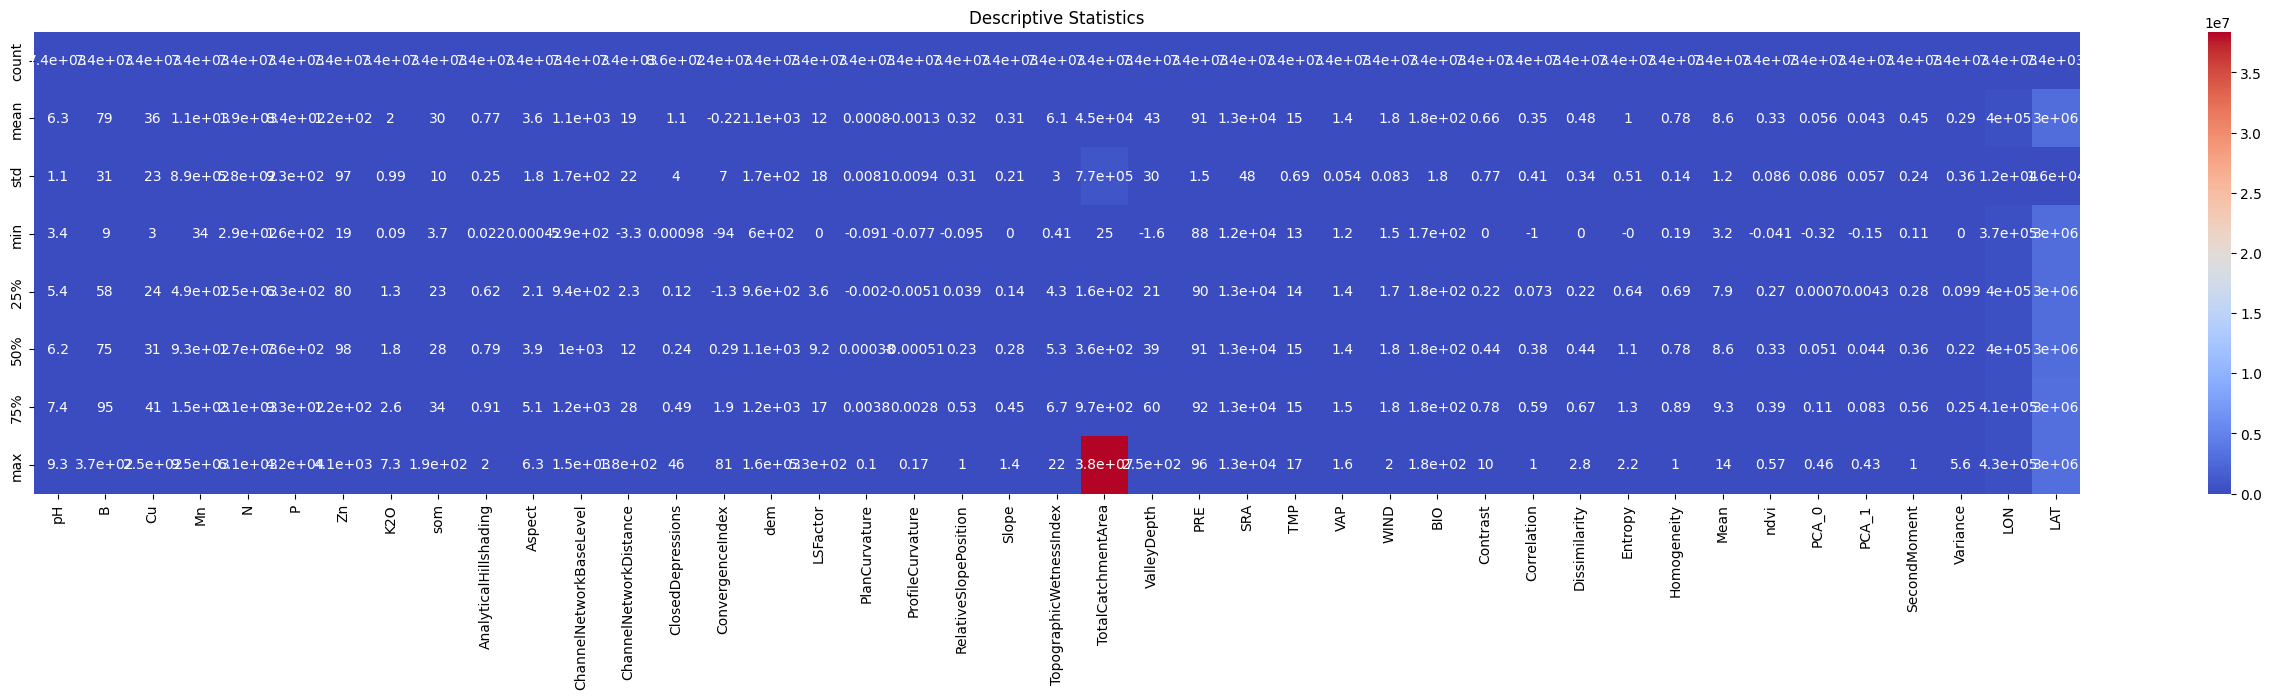

In [5]:
# 绘图
%matplotlib inline
plt.figure(figsize=(33, 6))
sns.heatmap(data.describe(), annot=True, cmap='coolwarm')
plt.title('Descriptive Statistics')
plt.show()



In [7]:
# 区分类别特征
data['TDQS'] = data['TDQS'].astype('str')

In [6]:
# 查看分析报告
profile = ProfileReport(data,title="Pandas Profiling Report")
# 导出数据分析报告
profile.to_file(r"F:\cache_data\pre_property_table\ky\report\ky_report_pdf.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# 查看分析报告
sv_file = sv.analyze(data,target_feat='pH',pairwise_analysis="on")
# 导出数据分析报告
sv_file.show_html(filepath=r"F:\cache_data\pre_property_table\ky\report\ky_report_swiz.html")

                                             |          | [  0%]   00:00 -> (? left)

Report F:\cache_data\pre_property_table\ky\report\ky_report_swiz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
